In [1]:
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('UNpalmoilimportexport.csv')
df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Albania,2015,"Palm oil, crude",Import,8845.0,7308.0,Weight in kilograms,7308.0
1,Albania,2014,"Palm oil, crude",Import,370020.0,376420.0,Weight in kilograms,376420.0
2,Albania,2013,"Palm oil, crude",Import,653860.0,570210.0,Weight in kilograms,570210.0
3,Albania,2012,"Palm oil, crude",Import,744045.0,570430.0,Weight in kilograms,570430.0
4,Albania,2011,"Palm oil, crude",Import,830556.0,530723.0,Weight in kilograms,530723.0


In [3]:
df.Flow.value_counts()

Import       2883
Export       1577
Re-Export     104
Re-Import      21
Name: Flow, dtype: int64

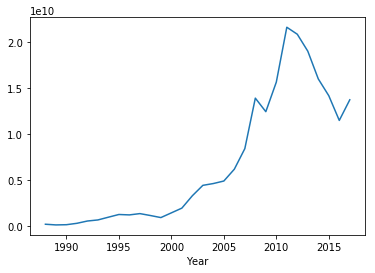

In [4]:
df[(df.Flow == 'Import')].groupby('Year')['Trade (USD)'].sum().plot()

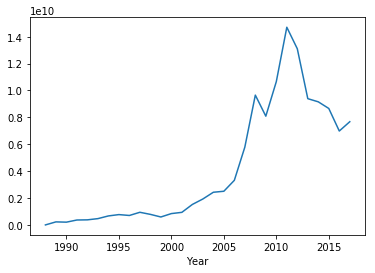

In [5]:
df[(df.Flow == 'Export')].groupby('Year')['Trade (USD)'].sum().plot()

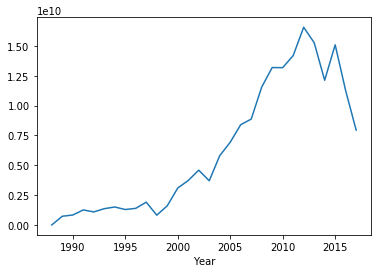

In [6]:
df[(df.Flow == 'Export')].groupby('Year')['Quantity'].sum().plot()

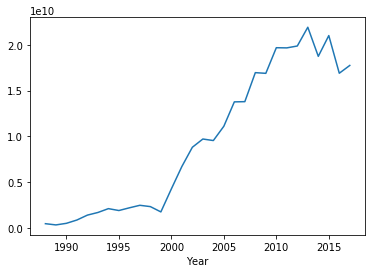

In [7]:
df[(df.Flow == 'Import')].groupby('Year')['Quantity'].sum().plot()

In [8]:
df.head()


,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Albania,2015,"Palm oil, crude",Import,8845.0,7308.0,Weight in kilograms,7308.0
1,Albania,2014,"Palm oil, crude",Import,370020.0,376420.0,Weight in kilograms,376420.0
2,Albania,2013,"Palm oil, crude",Import,653860.0,570210.0,Weight in kilograms,570210.0
3,Albania,2012,"Palm oil, crude",Import,744045.0,570430.0,Weight in kilograms,570430.0
4,Albania,2011,"Palm oil, crude",Import,830556.0,530723.0,Weight in kilograms,530723.0


In [9]:
df[df.Flow == 'Export']['Country or Area'].value_counts()

Malaysia                            29
Portugal                            29
Brazil                              29
Singapore                           29
Indonesia                           29
Colombia                            27
USA                                 27
Germany                             27
Spain                               26
Ecuador                             26
Netherlands                         26
United Kingdom                      25
France                              24
Italy                               24
Greece                              24
Thailand                            23
Denmark                             23
Costa Rica                          23
Guatemala                           23
Madagascar                          23
Burundi                             23
Senegal                             22
Ireland                             22
Honduras                            22
Canada                              22
India                    

In [10]:
exports_df = df[df.Flow == 'Export']

In [11]:
exports_df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
23,Algeria,2014,"Palm oil, crude",Export,1378.0,2500.0,Weight in kilograms,2500.0
39,Algeria,1999,"Palm oil, crude",Export,1796553.0,3325500.0,Weight in kilograms,3325500.0
73,Argentina,1997,"Palm oil, crude",Export,2.0,0.0,No Quantity,0.0
77,Argentina,1994,"Palm oil, crude",Export,10964.0,2500.0,Weight in kilograms,2500.0
88,Australia,2016,"Palm oil, crude",Export,56.0,0.0,Weight in kilograms,0.0


In [12]:
exports_df = exports_df.drop(columns=['Commodity', 'Flow', 'Weight (kg)', 'Quantity Name', 'Quantity'])

In [13]:
exports_df = exports_df.rename(index=str, columns={'Country or Area': 'country', 'Year': 'year', 'Trade (USD)': 'tradeUSD'})

In [14]:
exports_df.head()

,country,year,tradeUSD
23,Algeria,2014,1378.0
39,Algeria,1999,1796553.0
73,Argentina,1997,2.0
77,Argentina,1994,10964.0
88,Australia,2016,56.0


In [15]:
exports_df.to_csv('exports.csv', index=False)

In [16]:
imports_df = df[df.Flow == 'Import']

In [17]:
imports_df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Albania,2015,"Palm oil, crude",Import,8845.0,7308.0,Weight in kilograms,7308.0
1,Albania,2014,"Palm oil, crude",Import,370020.0,376420.0,Weight in kilograms,376420.0
2,Albania,2013,"Palm oil, crude",Import,653860.0,570210.0,Weight in kilograms,570210.0
3,Albania,2012,"Palm oil, crude",Import,744045.0,570430.0,Weight in kilograms,570430.0
4,Albania,2011,"Palm oil, crude",Import,830556.0,530723.0,Weight in kilograms,530723.0


In [18]:
imports_df = imports_df.drop(columns=['Commodity', 'Flow', 'Weight (kg)', 'Quantity Name', 'Quantity'])
imports_df = imports_df.rename(index=str, columns={'Country or Area': 'country', 'Year': 'year', 'Trade (USD)': 'tradeUSD'})

In [19]:
imports_df.head()

,country,year,tradeUSD
0,Albania,2015,8845.0
1,Albania,2014,370020.0
2,Albania,2013,653860.0
3,Albania,2012,744045.0
4,Albania,2011,830556.0


In [20]:
imports_df.to_csv('imports.csv', index=False)

In [21]:
imports_summed = imports_df.groupby('country').sum()
exports_summed = exports_df.groupby('country').sum()

In [22]:
imports_summed.drop(columns='year', inplace=True)
exports_summed.drop(columns='year', inplace=True)

In [25]:
imports_summed.to_csv('importsSummed.csv')
exports_summed.to_csv('exportsSummed.csv')

In [39]:
imports_summed.describe()

,tradeUSD
count,1.930000e+02
mean,1.050876e+09
std,5.174941e+09
min,1.050000e+02
25%,3.450440e+05
50%,1.053947e+07
75%,1.725500e+08
max,5.032843e+10
